In [3]:
!kaggle datasets download -d mathurinache/math-dataset
!unzip /content/math-dataset.zip

from IPython.display import clear_output
clear_output()

In [4]:
from pathlib import Path
import json

In [11]:
X_train, Y_train = [], []
dir_path = Path("/content/MATH/train")
files = list(dir_path.rglob("*.json"))
for file in files:
  with open(file, "r") as f:
    JSON = json.load(f)
    Y_train.append(JSON["solution"])
    X_train.append(JSON["problem"])

In [14]:
print("Example question:")
print('-'*100)
print(X_train[0], '\n')
print('-'*100)
print("solution:\n")
print(Y_train[0])
print('-'*100, '\n'*2)
print("Number of questions & solutions:", len(X_train))

Example question:
----------------------------------------------------------------------------------------------------
Let $S$ be the sum of all the real coefficients of the expansion of ${(1+ix)}^{2009}$.  What is $\log_{2}(S)$? 

----------------------------------------------------------------------------------------------------
solution:

By the Binomial Theorem,
\[(1 + ix)^{2009} = 1 + \binom{2009}{1} ix - \binom{2009}{2} x^2 - \binom{2009}{3} ix^3 + \binom{2009}{4} x^4 + \dotsb.\]Also,
\[(1 - ix)^{2009} = 1 - \binom{2009}{1} ix - \binom{2009}{2} x^2 + \binom{2009}{3} ix^3 + \binom{2009}{4} x^4 + \dotsb.\]Adding the two, all the imaginary terms cancel, and we are left with the real terms:
\[(1 + ix)^{2009} + (1 - ix)^{2009} = 2 \left[ 1 - \binom{2009}{2} x^2 + \binom{2009}{4} x^4 + \dotsb \right].\]Then we can find the sum of the real terms by dividing by 2 and setting $x = 1$:
\[\frac{(1 + i)^{2009} + (1 - i)^{2009}}{2}.\]We can write
\begin{align*}
(1 + i)^{2009} &= (1 + i) (1 + 

In [61]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Activation

In [60]:
vocabulary_size = 5000
maxlenX  = 900
maxlenY = 1000
embed_dim = 16
unknown_token = "UNK"
hidden_neurons = 100
batch = 32

In [55]:
tokenizer = Tokenizer(num_words=vocabulary_size, oov_token=unknown_token)
tokenizer.fit_on_texts(X_train)

Xtr = tokenizer.texts_to_sequences(X_train)
XtrPADDED = pad_sequences(Xtr, maxlen=maxlenX, padding="post")

Ytr = tokenizer.texts_to_sequences(Y_train)
YtrPADDED = pad_sequences(Ytr, maxlen=maxlenY, padding="post")

In [64]:
XtrPADDED.shape, YtrPADDED.shape

((7500, 900), (7500, 1000))

In [56]:
print("Token: ", Xtr[1])
print(tokenizer.sequences_to_texts([Xtr[1]]))
print(X_train[1])

Token:  [25, 2, 298, 49, 3, 28, 9, 164, 9, 11, 37, 5, 151, 9, 151, 39, 11]
['find the maximum value of f x 3x x 3 for 0 le x le sqrt 3']
Find the maximum value of
\[f(x) = 3x - x^3\]for $0 \le x \le \sqrt{3}.$


In [59]:
model = Sequential([

                    layers.Input(shape=(maxlenX,)),
                    layers.Embedding(input_dim=vocabulary_size, output_dim=embed_dim, mask_zero=True),
                    LSTM(hidden_neurons, return_sequences=False),
                    RepeatVector(maxlenY),
                    LSTM(hidden_neurons, return_sequences=True),
                    TimeDistributed(Dense(vocabulary_size)),
                    Activation('softmax')

])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 900, 16)             │          80,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 100)                 │          46,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 1000, 100)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 1000, 100)           │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 1000, 5000)          │         505,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 1000, 5000)          │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 712,200 (2.72 MB)

 Trainable params: 712,200 (2.72 MB)

 Non-trainable params: 0 (0.00 B)

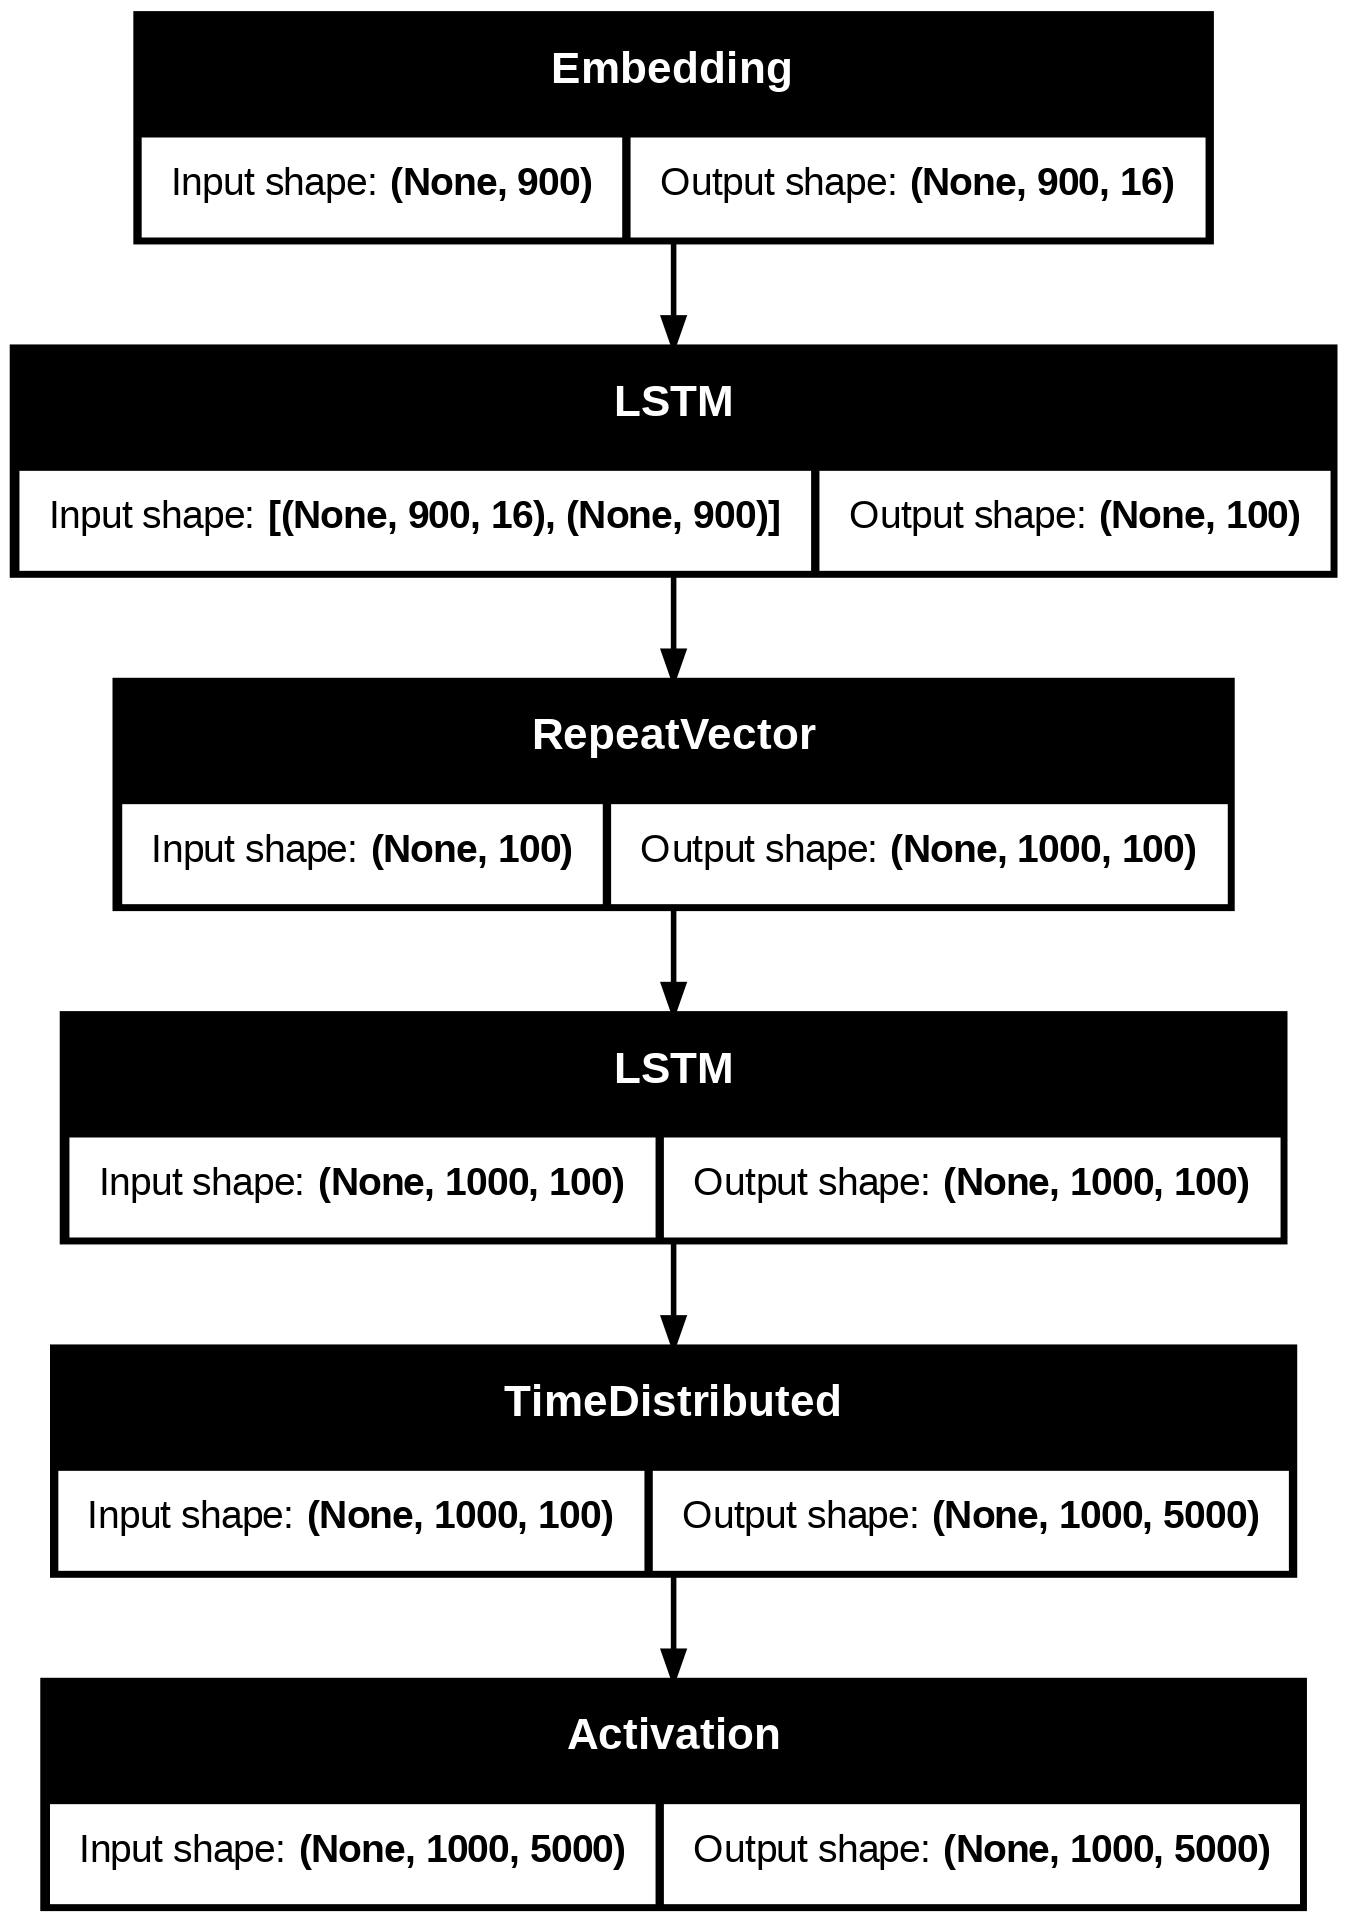

In [63]:
tf.keras.utils.plot_model(model, to_file="model.png",
           expand_nested=True, show_shapes=True)